# Simple Bayesian Inference (Using PyMC3)
References: https://towardsdatascience.com/conducting-bayesian-inference-in-python-using-pymc3-d407f8d934a5

### Idea
- We observe some data that we are interseted in doing inference on. In particular, we would like to infer something about the parameter $\theta$ (this is usually some moment of the distribution such as the mean or variance).
- Maximum likelihood estimation tends to overfit, so we incorperate prior information, $P(\theta)$, as a way of regularizing our estimation.
- To do this kind of inference, we utilize bayes theorem:

###      $P(\theta|data) = \frac{P(data|\theta)P(\theta)}{P(data)}$

#### $P(\theta|data)$ - Posterior Distribution
#### $P(data|\theta) = \prod_{i=1}^{n} P(data_i|\theta)$ - Likelihood
#### $P(\theta)$ - Prior
#### $P(data) = \sum_{\theta} P(data|\theta)P(\theta) <=> \int_{\theta} P(data|\theta)P(\theta) $ - Normalizing Constant

### Discrete Example
- We are interested in determining the probability that a random variable will take on the value 1. We will generate fake data in which the true probability of 1 is 0.35.

In [11]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Generate some random binary data
X = np.random.choice([0,1],size=1000,p=[0.65,0.35])

print(f"Maximum Likelihood Estimate:")
print(f"P(theta = 1) = {np.mean(X)}")

Maximum Likelihood Estimate:
P(theta = 1) = 0.335


- We now define the model. We assume a prior beta distribution and a bernoulli likelihood.



In [12]:
with pm.Model() as model:
    # define the prior
    theta = pm.Beta('theta', 2, 2)
    
    # define the likelihood
    data = pm.Bernoulli('data', theta, observed=X)
    
    # get the samples
    trace = pm.sample()

/Users/HarrisonHoffman/opt/anaconda3/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 21 seconds.


/Users/HarrisonHoffman/opt/anaconda3/lib/python3.7/site-packages/arviz/utils.py:661: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  ("Keyword argument credible_interval has been deprecated " "Please replace with hdi_prob"),


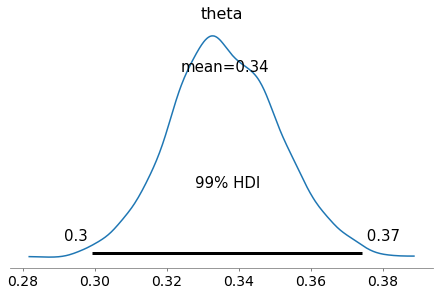

In [13]:
# Visualize results
with model:
    pm.plot_posterior(trace, credible_interval=0.99)

- We can see that the mean of the posterior distribution is pretty close to our MLE estimate, however, unlike MLE, we also get a measure of uncertainty. That is, in the above case, we obtained a 99% credible interval. We are able to say, with a probability of 99%, theta is somewhere between 0.3 and 0.37.